## Components of EDA
    1.Data Analysis
    2.Feature Engineering
    3.Feature Selection

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [5]:
dataset=pd.read_csv('ChurnTrainDataset.csv')
print("The dimension of dataset is :",dataset.shape)
dataset.head()

The dimension of dataset is : (4250, 20)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107.0,area_code_415,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,no
1,NJ,137.0,area_code_415,no,no,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,no
2,OH,84.0,area_code_408,yes,no,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,no
3,OK,75.0,area_code_415,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,no
4,MA,121.0,area_code_510,no,yes,24.0,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0,no


## Data Analysis

In [12]:
# Checking missing values feature name and its percentage
nan=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4), ' % missing value')

state 0.0042  % missing value
account_length 0.008  % missing value
area_code 0.0038  % missing value
voice_mail_plan 0.0031  % missing value
number_vmail_messages 0.008  % missing value
total_day_minutes 0.0024  % missing value
total_day_calls 0.0005  % missing value
total_day_charge 0.0019  % missing value
total_eve_minutes 0.0082  % missing value
total_eve_calls 0.004  % missing value
total_eve_charge 0.0019  % missing value
total_night_minutes 0.0005  % missing value
total_night_calls 0.0012  % missing value
total_night_charge 0.0016  % missing value
total_intl_minutes 0.0012  % missing value
total_intl_calls 0.0031  % missing value
total_intl_charge 0.0071  % missing value
number_customer_service_calls 0.0007  % missing value
churn 0.0052  % missing value


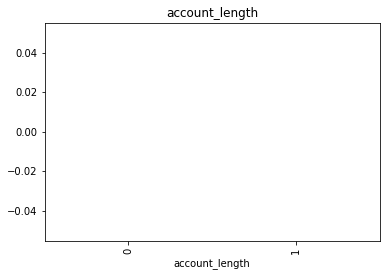

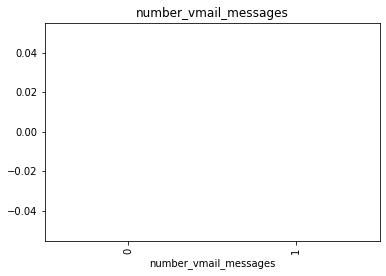

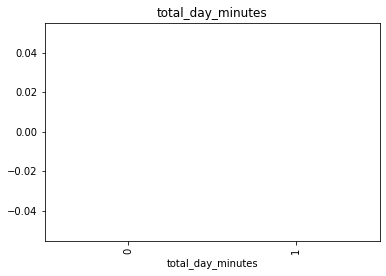

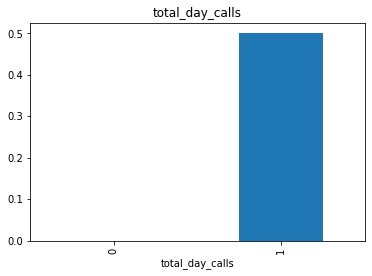

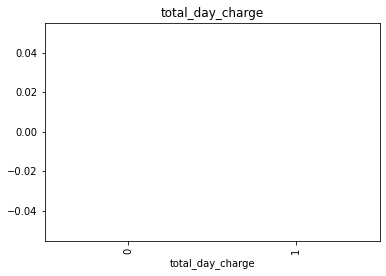

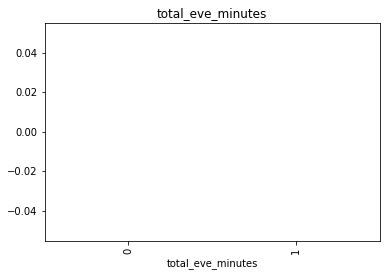

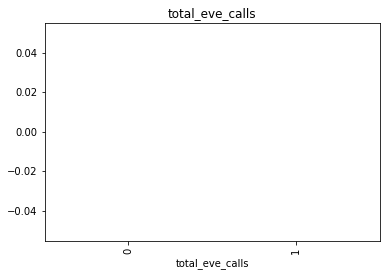

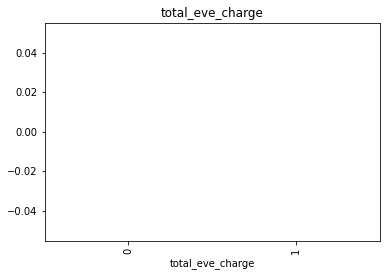

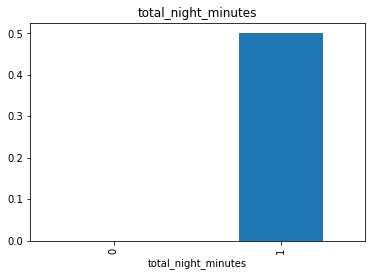

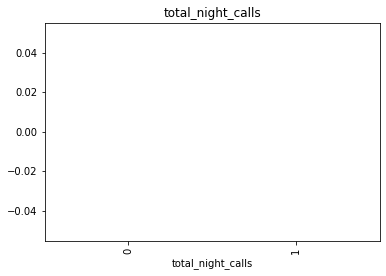

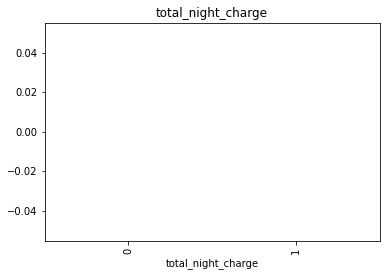

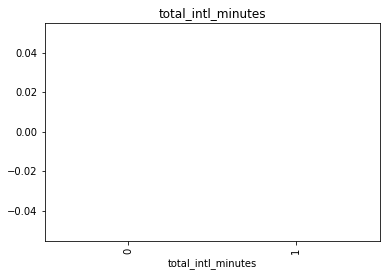

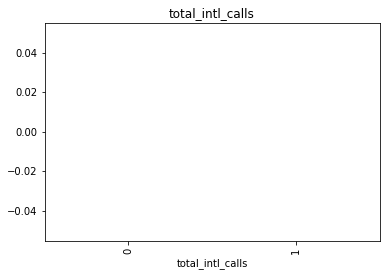

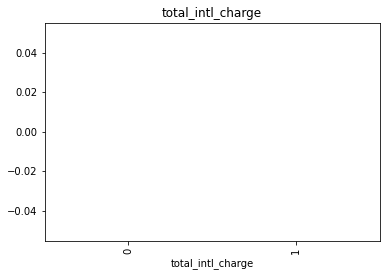

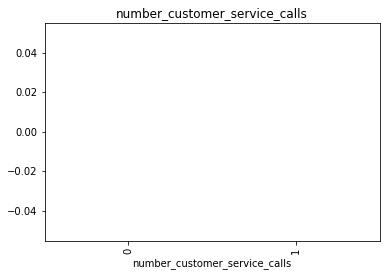

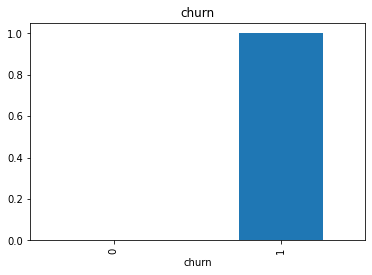

In [79]:
# Before handling missing values, lets see if they have any dependency on the target variable
for feature in nan:
    data=dataset.copy()
    a={'yes':1,'no':0}
    data['churn']=data.churn.map(a)
    if data[feature].dtype != 'O' and data[feature].dtype !='str':
        data[feature]=np.where(data[feature].isnull(),1,0)
        data.groupby(feature)['churn'].median().plot.bar()
        plt.title(feature)
        plt.show()

In [ ]:
# Extract all the nan values then groupby churn

In [49]:
data.isnull().sum()

state                            18
account_length                   34
area_code                        16
international_plan                0
voice_mail_plan                  13
number_vmail_messages            34
total_day_minutes                10
total_day_calls                   2
total_day_charge                  8
total_eve_minutes                35
total_eve_calls                  17
total_eve_charge                  8
total_night_minutes               2
total_night_calls                 5
total_night_charge                7
total_intl_minutes                5
total_intl_calls                 13
total_intl_charge                30
number_customer_service_calls     3
churn                             0
dtype: int64

In [45]:
a={'yes':1,'no':0}
data['churn']=data.churn.map(a)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4232 non-null   object 
 1   account_length                 4216 non-null   float64
 2   area_code                      4234 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4237 non-null   object 
 5   number_vmail_messages          4216 non-null   float64
 6   total_day_minutes              4240 non-null   float64
 7   total_day_calls                4248 non-null   float64
 8   total_day_charge               4242 non-null   float64
 9   total_eve_minutes              4215 non-null   float64
 10  total_eve_calls                4233 non-null   float64
 11  total_eve_charge               4242 non-null   float64
 12  total_night_minutes            4248 non-null   f

In [58]:
data[feature].dtype != 'object'

True

In [62]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print("Number of numerical variables: ", len(numerical_features))
dataset[numerical_features].head()

Number of numerical variables:  15


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
1,137.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
2,84.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
3,75.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0
4,121.0,24.0,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0


churn
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_day_charge, dtype: object

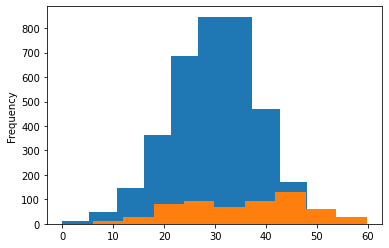

In [77]:
# Subplots
dataset.groupby(['churn'])['total_day_charge'].plot(kind='hist')

churn
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_eve_charge, dtype: object

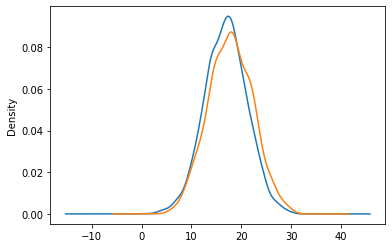

In [80]:
dataset.groupby(['churn'])['total_eve_charge'].plot(kind='kde')

churn
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_night_charge, dtype: object

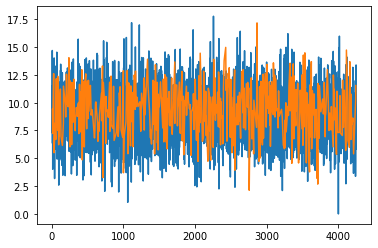

In [73]:
dataset.groupby(['churn'])['total_night_charge'].plot()